In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Introduction & Statistical Prediction

There are many instances where we would like to have knowledge about the future. From tomorrow's weather forecast to the possibility of having to deal with a serious illness, we would like to have an 'informed guess' about that future event. Prediction is a statement about a future event. It can be seen as a means of transferring knowledge about a sample of the population to the whole population. A statistical technique used for prediction is called Regression Analysis, where we estimate the relationships between a dependent variable (response) and one or more independent variables (features, predictors). Good predictions can be considered those with as small an error in their estimation as possible. 

There are many different techniques to predict future events for different types of problems. The response variable might be continuous, binary or with multiple categories, we might want to focus on our model's predictive capabilities, or care more about its interpretability. Here we would like to present a method for predicting a binary response, whether or not a patient has breast cancer. This can be done with the Logistic Regression method.

But in order to get there, we would like to show the motivation behind this type of regression. So we will start with another example, one of Linear Regression, the most common for of Regression Analysis. We assume the reader has some knowledge in Linear Algebra and Regression as well as basic knowledge in Python.

## A Linear Regression example

We import necessary libraries and create the data, concerning the Percentage Score a student received in a test and the Hours each student spent studying for that test. It would be logical to expect a linear relationship between these variables, meaning an increase in the hours studying for a test would result in an increase in a student score for that test.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create the data
x = np.array([2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,
              4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8])

y = np.array([21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86])

In [ ]:
# Fit the Linear Regression Model
regressor = LinearRegression()
regressor.fit(x.reshape(-1,1), y)

In [ ]:
# Plot the results
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,color="red")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In the image above, we can see our two variables, Y as a Percentage Score that a student received in a test, and X as the Hours that particular student spent studying. We can see a linear relationship between the two variables, and our Linear Regression line seems to fit our data very well.

In [ ]:
# Print intercept, coefficient and R squared as a measure of our model's fit to the data
print('intercept:', regressor.intercept_)
print('slope:',regressor.coef_)
print('R squared:',regressor.score(x.reshape(-1,1),y))

Here our intercept can be interpreted as the expected Percentage Score a student would get in the test, if they did not study at all $(X=0)$. Our coefficient can be interpreted as the expected change (increase) in a student's Percentage Score for every Hourly increase in their study time for that particular test. We can see that our model has fit the data very well, where a 95.3% of the variability can be described from our Linear Regression model.

Now we consider turning our dependent variable into a binary response, where if a student received a score above 50 they get a passing grade, value of '1', otherwise they get a failing grade, value of '0'.

In [ ]:
# Our dependent variable turned into a binary response
y = np.array([0,0,0,1,0,0,1,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,1,1])

# Fit the Linear Regression Model

regressor = LinearRegression()
regressor.fit(x.reshape(-1,1), y)

# Plot the results
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,color="red")
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.show()

# Print intercept, coefficient and R squared as a measure of our model's fit to the data
print('intercept:',regressor.intercept_)
print('slope:',regressor.coef_)
print('R squared:',regressor.score(x.reshape(-1,1),y))

We can clearly see that if our dependent variable Y is a binary variable, Linear Regression fails to fit our data well. The line that is produced does not really make sense, as we can see estimates in the y-axis that are not in the [0,1] interval and thus cannot be interpreted as probabilities. We would like to model these probabilities with a function that gives values between 0 and 1. So it is time to consider another Regression model, that of Logistic Regression.

## Classification and Regression

Classification is the problem of identifying in which category an observation belongs to. This could be a diagnosis, whether or not a patient has a disease, based on some observed characteristics of the patient. Or we could have multiple possible categories and not just two. For example, we could have a problem of classifying a set of images of animals, which may be different breeds of dogs, such as German Shepherd, Golden Retriever, Bulldog and so on.

If we generalize the idea of a category with two events to an idea of “one vs all” we could use the same method of our first example (the patient) to our second example (dog images) where we split a multi class classification problem into one binary classification problem per class. We consider one of the possible classes vs all the rest, and we do that for all classes.

We would like to analyze each individual observation into a set of quantifiable properties (explanatory variables), known as features. Another way would be by comparing a new observation to previous observations based on a distance function. Whatever method is considered, an algorithm that implements classification (binary or multiple) is called a ‘classifier’.  These classifiers need training data to understand how the given input variables (features)  are related to the class (eg. a patient has or does not have a disease). In other words, we could call this process supervised learning and classification is a type of supervised learning.

Supervised learning is the process of making an algorithm learn to map an input to a particular output. This algorithm can then help make predictions for new data points. One of the disadvantages of supervised learning can easily be thought of, and that is if we provide bad examples/bad data to our learning algorithm, then it is going to make inaccurate predictions, but there are always tools to help us measure our model’s predictive acccuracy.

There are many classification methods, such as Logistic Regression, k Nearest Neighbours, Decision Trees, Support Vector Machines and others. We will focus on Logistic Regression: what is it, how we can implement it and how we can interpret the results.

One definition of Regression can be that “it is a statistical method that attempts to determine the strength and character of the relationship between one dependent variable (Y) and a series of other variables (X independent variables)”. The most common form of Regression Analysis is Linear Regression, where we assume a linear relationship between these variables (Y and X): $Y=a+bX$, and we try to fit a line to our data that best describes them, according to a criterion that we set. 


## Logistic Resgression approach

Logistic Regression is a Regression model, since the output is a prediction for the probability that a data point belongs to the category/label considered as ‘success’. Now when we consider a threshold value in order to classify our new data point, it becomes a classification techique. 

Logistic Regression assumes another kind of function, a sigmoid function, that would fit our data points better.

But how to build a Logistic Regression model?

As we saw in the Linear Regression example, when we coded our dependent variable Y into 0 and 1, we had trouble fitting that particular Regression line. It became obvious that we need to model our probabilities with a function that produces values between 0 and 1. A function that fits this criterion is a logistic function with a so-called sigmoid curve, as shown in the graph below:

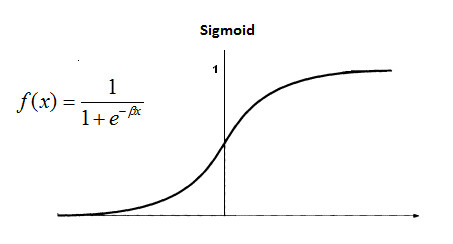

If we apply this approach to our previous example, we will have a curve like the following:

In [ ]:
import seaborn as sns
sns.regplot(x=x, y=y, logistic=True)

We can clearly see now that, if we used a logistic function, our prediction line would be much better than before.

The logistic regression function has the form:
$$p(X) = \frac{exp(\beta_0 + \beta_1*X)}{1+exp(\beta_0 + \beta_1*X)}$$
which can be written as equation (1) below:
$$\frac{p(X)}{1-p(X)} = exp(\beta_0 + \beta_1*X) \tag{1}\label{eq:1} $$
where the left-hand side is called **the odds of an event X** and takes values between $0$ and $\infty$, which in our case indicate very low and very high probabilites, respectively. 

Though, if we consider the odds of an event as:
$$\text{odds of event happening} = 0.9/(1—0.9)=0.9/0.1$$,
or 9-to-1, the odds of the opposite of p would be: 
$$\text{odds of event not happening} = 0.1/(1-0.1)=0.1/0.9$$, 
or 0.11, which is **not** the opposite of what we found above. 

In order to correct for this asymmetry, we take the natural logarithm of the function $ln$ and have the result:
$$log(\frac{p(X)}{1-p(X)}) = \beta_0 + \beta_1*X$$

Now, the results above would become $ln(0.9/0.1)=2.217$ and $ln(0.1/0.9)= - 2.217$, and so the logarithm of the odds of our event happening is exactly the opposite to the logarithm of the odds of our event not happening. This logarithm of odds is called a logit function. We can also see that the logit is linearly connected with our independent variable X. However, the relationship between $p(X)$ and $X$ is not a straight line, we do not have the same interpretation for our parameters here, as we did in Linear Regression example, i.e. a one-unit increase in $X$ does not correspond to $\beta_1$ change in $p(X)$. In this Logistic Regression model, a one-unit increase in $X$ changes the log-odds by $\beta_1$, or it multiplies the odds by $e^{\beta_1}$. But regardless, if $\beta_1$ is positive, then increasing $X$ will increase $p(X)$, and if $\beta_1$ is negative, then increasing $X$ will decrease $p(X)$.

In order to estimate our parameters, $\beta_0$ and $\beta_1$, we will use the Maximum Likelihood Estimation approach: we seek estimates for $\beta_0$ and $\beta_1$ such that our predicted probability $\hat{p}(x_i)$ of success for data point $i$ corresponds as closely as possible to the observed value of that data point.

In order to get the best possible estimates, we calculate the log-likelihood function (LLF) and maximize it:

$$LLF = \sum\limits_{i=1}^{n}[y_i*(log(p(x_i)) + (1-y_i)*log(1-p(x_i))]$$

When $y_i = 0 => LLF = log(1-p(x_i))$, and if $p(x_i)$ is close to $y_i = 0$ then $log(1-p(x_i))$ is close to 0 as well, which is the outcome we want.

When $y_i = 1 => LLF = y_i*log(p(x_i))$, and if $p(x_i)$ is close to $y_i = 1$ then $log(p(x_i)) = 0$ and if $p(x_i)$ is far from 1, then $log(p(x_i))$ is a large negative number.

After we maximize our LLF, we obtain the best weights of function $p(x_i))$. Let's say for example, that we computed $b_0, b_1$ for the logit $f(x_1) = b_0 + b_1 x_1$, then we can compute the probability $p(x_1) = 1 / (1+exp(-f(x_1)))$ and according to $p(x_1)$ we can classify that observation:

If $p(x_1) > 0/5$ then predicted output is 1.

If $p(x_1) < 0.5$ then predicted output is 0.

Here we only considered one variable $x_1$, but this can be generalized in the case where we would have a matrix instead of one variable.

One of the problems we face in machine learning models is to overfit them, i.e. our model has learnt the training data "too well", which can be a bad thing. An overfitted model can then have poor performance when applied in data other than the ones used to train it.

One method to account for overfitting is called Regularization. Regularization tries to reduce the complexity of our model, and it penalizes large coefficients.
* L1 regularization penalty : $|b_0| + |b_1| + ... + |b_r|$, where $r$ is the number of features/independent variables we have considered.
* L2 regularization penalty : $b_0^2 + b_1^2 + ... + b_r^2$
* Elastic-net, which is a linear combination of L1 and L2 methods.
Regularization can improve performance on data other than the ones used to train our model.

After applying all the above, we check our model's performance. This can be done by comparing our actual values and the ones we got as predicted values and then count the correct and incorrect predictions. This will be done with the 'test set', a number of observations that we left out of the computation process. We will compare those values with the ones we got from our model and see how accurate we are, or not. 

$$ \begin{bmatrix}
     TP & FP \\
     FN & TN \\   
   \end{bmatrix} $$
  
where 
* TP(True Positives): correctly predicted ones, 
* TN(True Negatives): correctly predicted zeroes, 
* FN(False Negatives): incorrectly predicted zeroes,
* FP(False Positives): incorrectly predicted ones

## A Logistic Regression Example

Let us consider an example more thoroughly, in order to better understand what has been presented so far. 

## Our data

In [ ]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

The dataset used in our example contains 569 observations for patients with possibility of breast cancer, and can be found here:
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
We have our target variable ‘Diagnosis’ with two categories: ‘M’ for “Malignant” and ‘B’ for “Benign” for the tumor, one ID feature,which we will drop from our dataset and 28 other features,  which we will use in order to predict the class that a patient belongs to. We also know that our independent variables have continuous values. There is also a column, ‘Unnamed: 32’ , with no values whatsoever, which we will also drop. All the above can be seen in the following outputs:


In [ ]:
dataset = dataset.drop(["Unnamed: 32","id"],axis=1)
dataset.dtypes

In [ ]:
dataset.isnull().values.any()

In [ ]:
dataset.groupby(["diagnosis"]).diagnosis.count()

We can see that we have 357 cases for 'Benign' and 212 for 'Malignant' tumor and that there are no missing cases.

We would like to see the correlations between our variables, and if they are strong or not.import matplotlib.pyplot as plt
import seaborn as sns
dataset.groupby(["diagnosis"]).diagnosis.count()
plt.figure(figsize=(15, 12))
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 12))
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket")

We can see that there are some  variables that are strongly positively correlated with each other, as well as some that are negatively correlated, for example ‘smoothness_se’ is negatively correlated with 3 other variables.

We make the decision to not remove any of our features in this Logistic Regression example, and so we move on with our analysis.

## Data Preprocessing

We set the features and the target variable.

In [ ]:
X = dataset.drop(["diagnosis"],axis=1)
y = dataset.iloc[:,0:1].values

We encode our target variable, meaning that we want to have '0' and '1' values for 'Benign' and 'Malignant' tumor cases respectively.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y.ravel())

We split the dataset into training and test set. On the training set we will 'train' our regression model and on the test set we will see how it will perform. We will predict the values of the test set and then compare our results with the real values of the test set. We set 80% of our dataset rows as the training set and the remaining 20% as the test set. We also define a 'random_state = 0' for reproducibility, in order to always get the same result.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

As we stated previously, Logistic Regression also performs Regularization on our parameters, one form of penalty for large coefficients. In this example, we have many different independent variables in different units of measurement, which can pose a problem if we want to select the most important features later in our analysis. We decide to standardize our variables, in order to overcome this problem and so that all independent variables will be in the same scale.

We have to be careful though, not to standardize all our data at the same time. We should standardize our train set first, with its own mean and variance and our test set separately, with its own mean and variance. That is done because the test set is supposed to be data that we have not yet received, so if we standardize all our dataset, in the computation of mean and variance, we consider values that should not be there.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We fit our Logistic Regression classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression().fit(X_train,y_train)

y_pred = classifier.predict(X_test)
print('intercept:',classifier.intercept_)
print('coefficients:',classifier.coef_)

In [ ]:
# We print the odds of our coefficients, for easier interpretation
print('odds of coefficients:',np.exp(classifier.coef_))

We can see the intercept and the coefficients of our Logistic Regression classifier. These are interpreted in a different manner than in Linear Regression, because here we have calculated the logit of odds and not the probability. If we want the odds we have to convert, by taking the exponents of the values presented above. For example, our first coefficient $0.34$, which refers to the independent variable/feature 'radius_mean' can be interpreted as: for every one-unit increase in 'radius_mean', the odds that the patient represented in the observation is in the target class (“1 - Malignant”) are over $exp(0.34 = 1.403)$ as large as the odds that they won’t be in the target class, **if** all other variables are held constant. To convert this to a probability, we have $1.403 / (1+1.403) = 0.584$, or a 58.4% increase in probability for the patient to be in class '1 - Malignant' for every one-unit increase in the 'radius_mean' variable, **if** all other variables are held constant. 

In the case of a negative coefficient (or when the odds of that coefficient are less than 1), we simply take $1/ \text{coefficient}$. For example our sixth coeffiecient $(-0.4458)$ with odds $exp(-0.4458) = 0.64$ will become $1/0.64 = 1.56$, meaning for every one-unit increase in our 'compactness_mean' variable the odds of the patient represented in the observation **not** being in the target class ("1 - Malignant") are 1.56 as likely as the odds of the patient being in the target class, **if** all other variables are held constant. 

We import some metrics, to better understand our model's accuracy.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
cfm = confusion_matrix(y_test,y_pred)
print('Precision', cfm[0, 0] / sum(cfm[:, 0]))
print('Recall', cfm[0, 0] / sum(cfm[0, :]))
print('Specificity', cfm[1, 1] / sum(cfm[1, :]))
cfm

From the matrix we can see that
* True Positives: 65, 
* True Negatives: 45, 
* False Negatives: 2,
* False Positives: 2

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
print(classification_report(y_test, y_pred,target_names=['M', 'B']))

We can see that our model has done very well, considering we only got two False Positives and two False Negatives and an accuracy of 96.5%. As for our Classification Report, the 'precision' label refers to our classifier's ability to not label an instance positive while it is actually negative, i.e. what percent of our predictors were correct (97%), the 'recall' label refers to the ability of our classifier to find all positive instances, i.e. what percent of the positive cases did it find (97%), and lastly, the 'f1-scre' label refers to a harmonic mean of our 'precision' and 'recall' labels with best score 1 and worst 0, and can be interpreted as what percent of positive predictions were correct (97%).

## ROC Curve and AUC

Receiver Operating Characteristic Curve (ROC) can be used to determine the diagnostic ability of a binary classifier. It is constructed by plotting the true positive rate (TPR) against the false positive rate (FPR).
$$TPR = TP / (TP + FN)$$ and $$FPR = FP / (FP + TN)$$

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. A random classifier would give points lying along the diagonal (FPR = TPR)(our baseline).

Area Under the Curve (AUC) is used to compare different classifiers, where we summarize the performance of each classifier into a single measurement. AUC measures the entire two-dimensional area underneath the ROC curve. It can be interpreted as the probability that the model ranks a random positive example more highly than a random negative example.

In [ ]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
y_test_pred_prob=classifier.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_test_pred_prob)

In [ ]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("False Possitive rate")
plt.ylabel("True Positive rate")
plt.title("Area Under ROC Curve")
plt.show()

From the above results we can see that our model has performed very well, with an AOC of 99.3%, close to a perfect diagnostic ability for our classifier.

## Conclusion

In this notebook we have presented the motivation behind Logistic Regression as a method of Classification, where we would like to predict the class that a future observation/patient would belong to, according to some of their characteristics. We have shown how to implement Logistic Regression in Python, what libraries and code to use in order to implement this analysis. Also we interpret the results of our analysis and how accurate our Classification technique actually is in this dataset. 

## References

1.  Dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
2. Terminology on Regerssion Analysis: https://en.wikipedia.org/wiki/Regression_analysis
3. https://realpython.com/logistic-regression-python/
4. http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html
5. Code for the Heatmap graph from: https://www.kaggle.com/d4rklucif3r/breast-cancer-wisconsin-eda-97-80/notebook
6. Classification Report explained: https://muthu.co/understanding-the-classification-report-in-sklearn/